In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, fetch_openml
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-4-8bf73ae46172>:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, 200)


(np.float64(-4.009642916485169),
 np.float64(4.847505788568275),
 np.float64(-2.715665954218645),
 np.float64(3.8624014156213637))

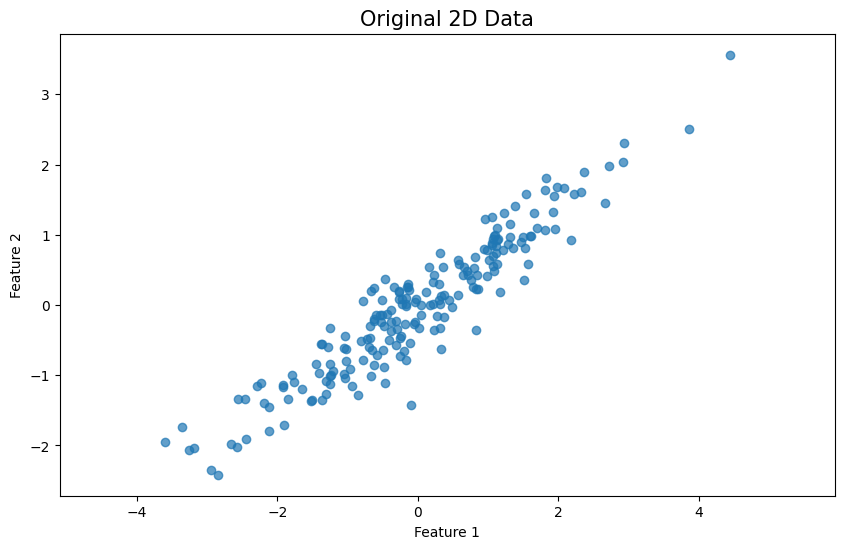

In [4]:
np.random.seed(42)
mean = [0, 0]
cov = [[2, 1.5], [1.5, 1]]  # Covariance matrix with correlation

# Generate a dataset
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Feature 1'], df['Feature 2'], alpha=0.7)
plt.title('Original 2D Data', fontsize=15)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')

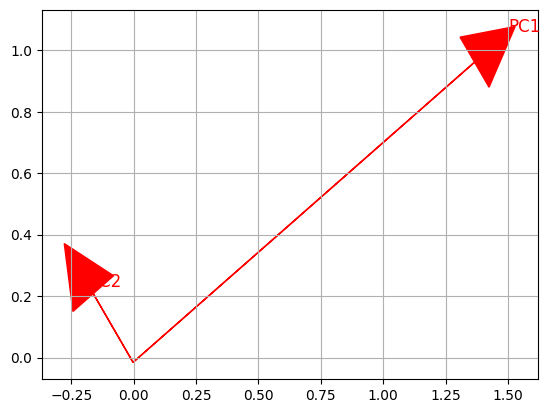

In [5]:
# Calculate mean vector and covariance matrix
mean_vec = np.mean(data, axis=0)
cov_matrix = np.cov(data.T)

# Calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by decreasing eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

# Plot the eigenvectors scaled by their eigenvalues
for i in range(2):
    plt.arrow(mean_vec[0], mean_vec[1],
              eigenvectors[0, i] * np.sqrt(eigenvalues[i]),
              eigenvectors[1, i] * np.sqrt(eigenvalues[i]),
              head_width=0.2, head_length=0.2, fc='red', ec='red')
    plt.text(mean_vec[0] + eigenvectors[0, i] * np.sqrt(eigenvalues[i]) * 1.1,
             mean_vec[1] + eigenvectors[1, i] * np.sqrt(eigenvalues[i]) * 1.1,
             f'PC{i+1}', color='red', fontsize=12)

plt.grid(True)
plt.show()

In [6]:
class PCA_from_scratch:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, X):
        # Store the mean for later use
        self.mean = np.mean(X, axis=0)

        # Center the data
        X_centered = X - self.mean

        # Compute the covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

        # Sort eigenvectors by decreasing eigenvalues
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store the results
        if self.n_components is None:
            self.n_components = X.shape[1]

        self.components = eigenvectors[:, :self.n_components]
        self.explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio = self.explained_variance / np.sum(eigenvalues)

        return self

    def transform(self, X):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [7]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Display information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")

Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


In [8]:
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['target'] = y
df_iris['target_name'] = [target_names[i] for i in y]

# Display the first few rows
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


<Figure size 1200x1000 with 0 Axes>

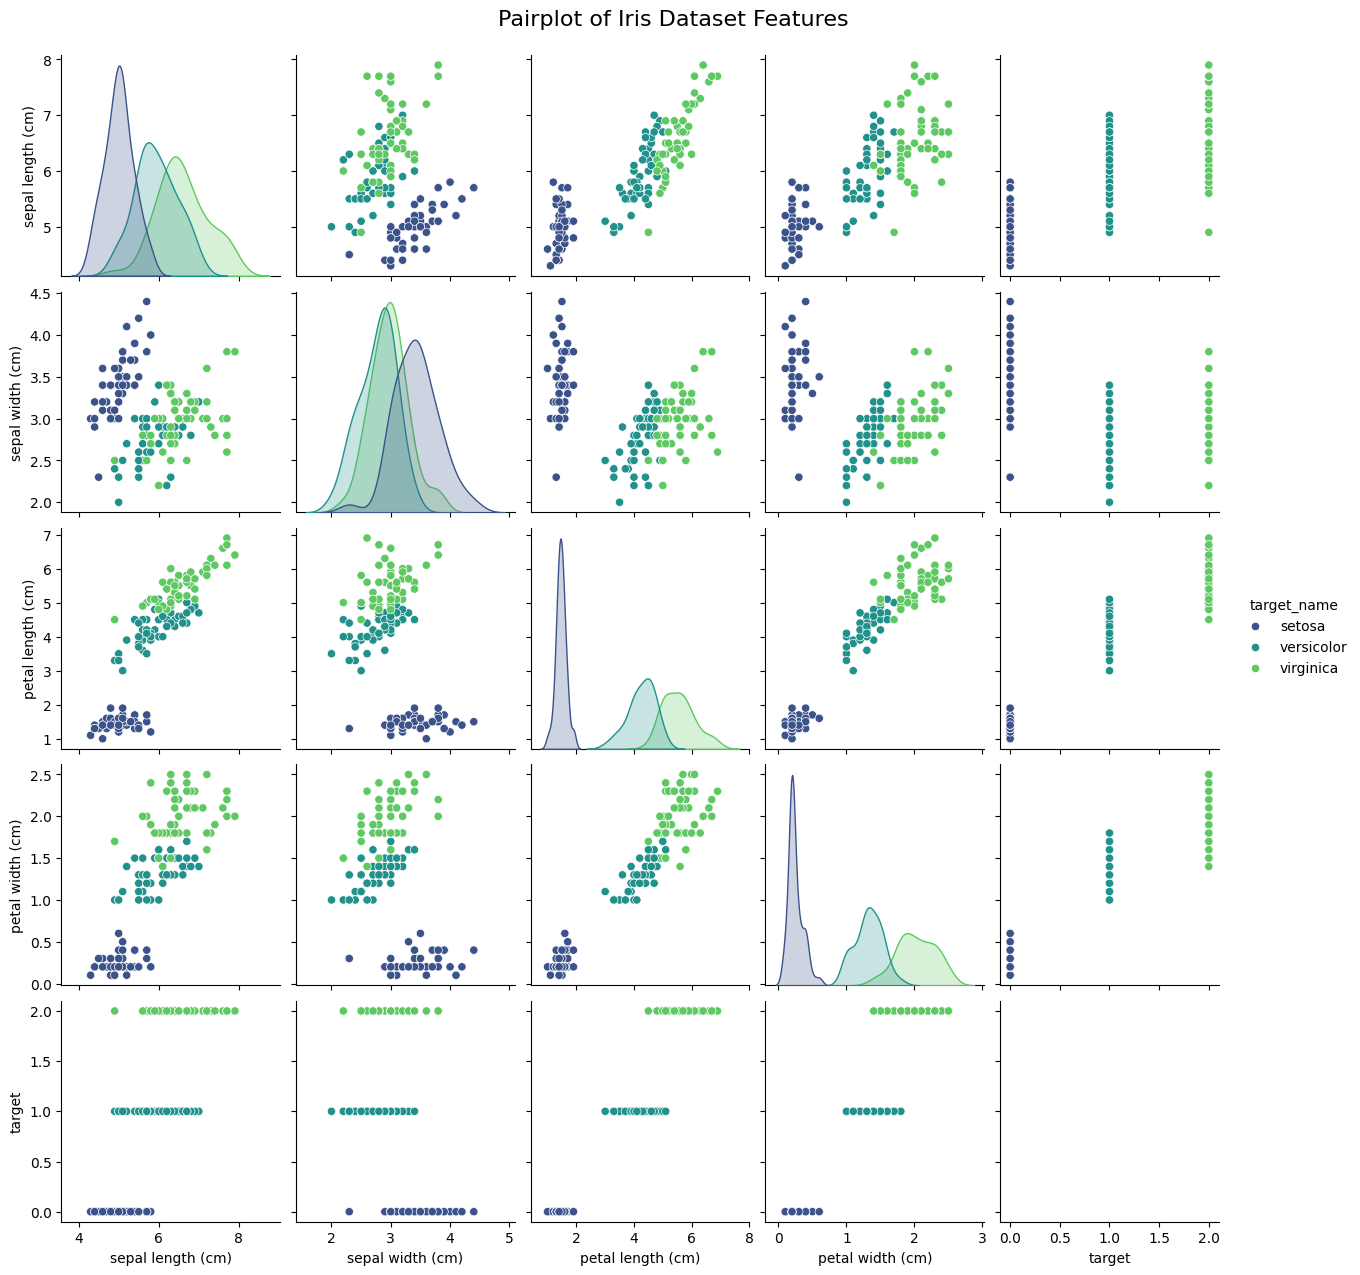

In [9]:
# Exploratory data analysis
plt.figure(figsize=(12, 10))

# Create a pairplot to visualize relationships between features
sns.pairplot(df_iris, hue='target_name', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02, fontsize=16)
plt.show()

In [10]:
# Data preprocessing: Standardization
# This is crucial for PCA as it's sensitive to the scale of the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the effect of standardization
df_scaled = pd.DataFrame(X_scaled, columns=feature_names)
print("Original data statistics:")
print(df_iris[feature_names].describe().round(2))
print("\nScaled data statistics:")
print(df_scaled.describe().round(2))

Original data statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   
mean                5.84              3.06               3.76   
std                 0.83              0.44               1.77   
min                 4.30              2.00               1.00   
25%                 5.10              2.80               1.60   
50%                 5.80              3.00               4.35   
75%                 6.40              3.30               5.10   
max                 7.90              4.40               6.90   

       petal width (cm)  
count            150.00  
mean               1.20  
std                0.76  
min                0.10  
25%                0.30  
50%                1.30  
75%                1.80  
max                2.50  

Scaled data statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count             150.00            150.00             150.00   

In [12]:
# Apply our custom PCA implementation to the scaled data
pca_scratch = PCA_from_scratch(n_components=2)
X_pca_scratch = pca_scratch.fit_transform(X_scaled)

# Calculate the total explained variance
explained_variance_scratch = pca_scratch.explained_variance_ratio

print(f"Explained variance ratio: {explained_variance_scratch}")
print(f"Total explained variance: {np.sum(explained_variance_scratch):.2f}")

Explained variance ratio: [0.72962445 0.22850762]
Total explained variance: 0.96


In [13]:
# Create a DataFrame for the transformed data
df_pca_scratch = pd.DataFrame(data=X_pca_scratch, columns=['PC1', 'PC2'])
df_pca_scratch['target'] = y
df_pca_scratch['target_name'] = [target_names[i] for i in y]

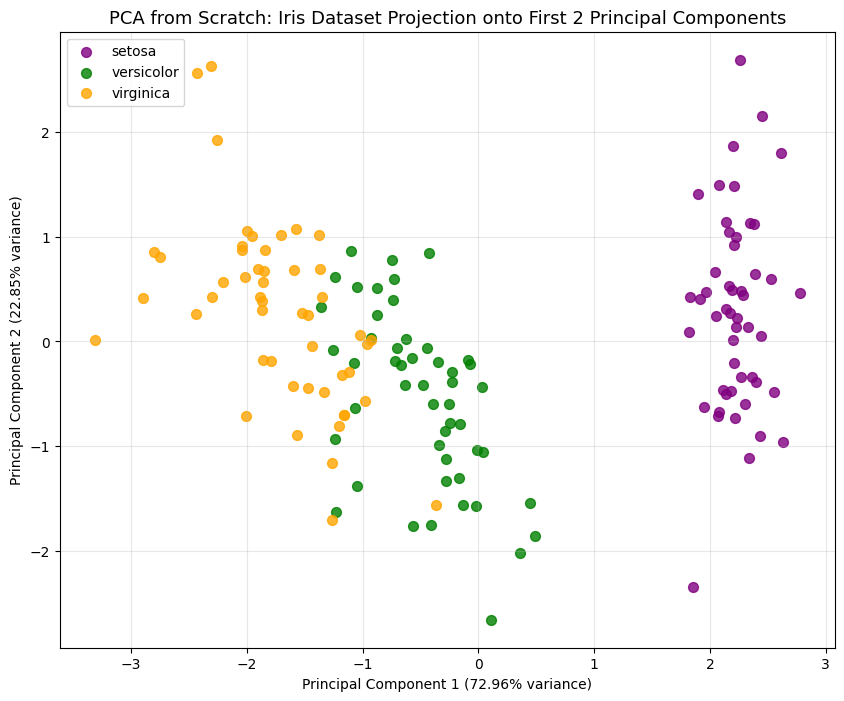

In [22]:
# Visualize the PCA results
plt.figure(figsize=(10, 8))
colors = ['purple', 'green', 'orange']
for target, color in zip(range(len(target_names)), colors):
    indices = df_pca_scratch['target'] == target
    plt.scatter(df_pca_scratch.loc[indices, 'PC1'],
                df_pca_scratch.loc[indices, 'PC2'],
                c=color, s=50, alpha=0.8, label=target_names[target])
plt.title('PCA from Scratch: Iris Dataset Projection onto First 2 Principal Components', fontsize=13)
plt.xlabel(f'Principal Component 1 ({explained_variance_scratch[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance_scratch[1]:.2%} variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# PCA using Sklearn

In [19]:
# Apply PCA using scikit-learn
sklearn_pca = PCA(n_components=2)
X_pca_sklearn = sklearn_pca.fit_transform(X_scaled)

# Compare the results
print("Scikit-learn PCA explained variance ratio:", sklearn_pca.explained_variance_ratio_)
print("Our PCA implementation explained variance ratio:", pca_scratch.explained_variance_ratio)

Scikit-learn PCA explained variance ratio: [0.72962445 0.22850762]
Our PCA implementation explained variance ratio: [0.72962445 0.22850762]


In [20]:
# Create a DataFrame for the sklearn transformed data
df_pca_sklearn = pd.DataFrame(data=X_pca_sklearn, columns=['PC1', 'PC2'])
df_pca_sklearn['target'] = y
df_pca_sklearn['target_name'] = [target_names[i] for i in y]

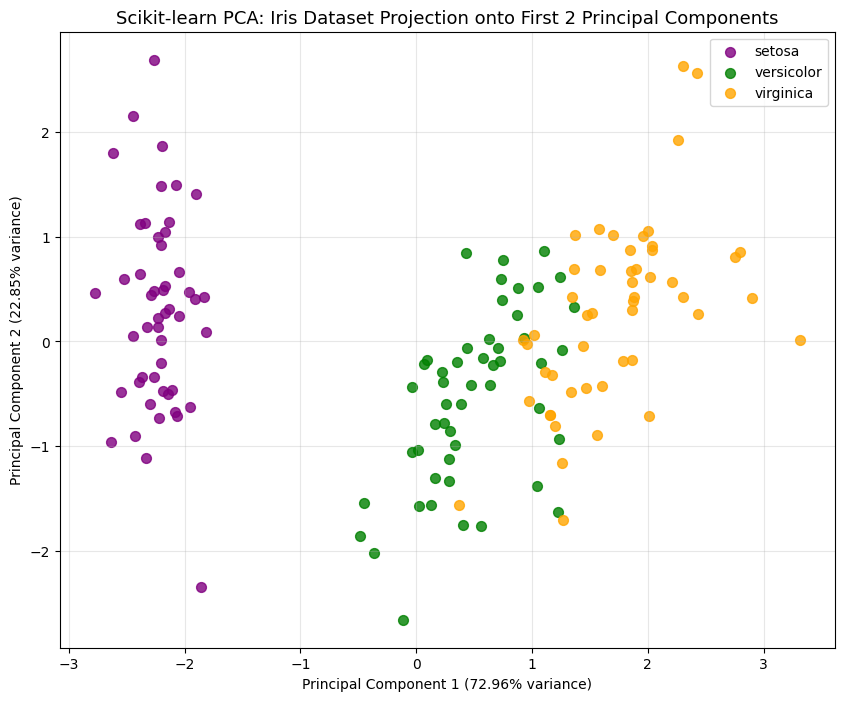

In [21]:
# Visualize the scikit-learn PCA results
plt.figure(figsize=(10, 8))
for target, color in zip(range(len(target_names)), colors):
    indices = df_pca_sklearn['target'] == target
    plt.scatter(df_pca_sklearn.loc[indices, 'PC1'],
                df_pca_sklearn.loc[indices, 'PC2'],
                c=color, s=50, alpha=0.8, label=target_names[target])

plt.title('Scikit-learn PCA: Iris Dataset Projection onto First 2 Principal Components', fontsize=13)
plt.xlabel(f'Principal Component 1 ({sklearn_pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({sklearn_pca.explained_variance_ratio_[1]:.2%} variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Optimal Number of Principal Components

In [23]:
# Fit PCA with all components
full_pca = PCA().fit(X_scaled)

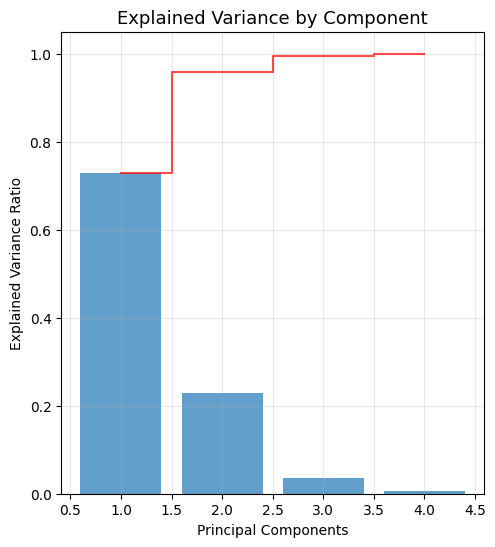

In [24]:
# Plot the explained variance
plt.figure(figsize=(12, 6))

# Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, len(full_pca.explained_variance_ratio_) + 1),
        full_pca.explained_variance_ratio_, alpha=0.7)
plt.step(range(1, len(full_pca.explained_variance_ratio_) + 1),
         np.cumsum(full_pca.explained_variance_ratio_), where='mid', color='red', alpha=0.7)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Component', fontsize=13)
plt.grid(True, alpha=0.3)

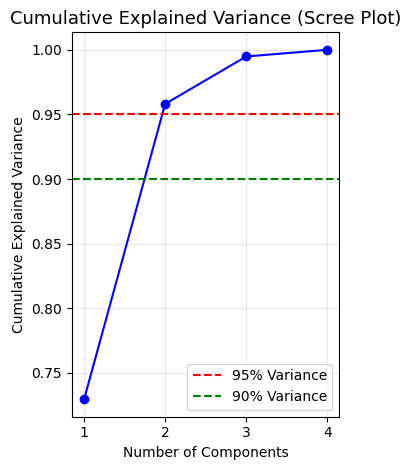

In [25]:
# Scree plot (with cumulative variance)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(full_pca.explained_variance_ratio_) + 1),
         np.cumsum(full_pca.explained_variance_ratio_), marker='o', linestyle='-', color='blue')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% Variance')
plt.grid(True, alpha=0.3)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance (Scree Plot)', fontsize=13)
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Calculate the number of components needed for 95% variance
n_components_95 = np.argmax(np.cumsum(full_pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to explain 95% of variance: {n_components_95}")

Number of components needed to explain 95% of variance: 2


In [27]:
# Let's use PCA as a feature extraction step in a machine learning pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [28]:
# Prepare data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Function to evaluate model performance with different numbers of components
def evaluate_pca_components():
    results = []
    for n_components in range(1, X.shape[1] + 1):
        # Create a pipeline with PCA and Random Forest
        pca_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=n_components)),
            ('classifier', RandomForestClassifier(random_state=42))
        ])

        # Train the model
        pca_pipeline.fit(X_train, y_train)

        # Predict and evaluate
        y_pred = pca_pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Extract variance information
        pca = pca_pipeline.named_steps['pca']
        explained_variance = sum(pca.explained_variance_ratio_)

        results.append({
            'n_components': n_components,
            'accuracy': accuracy,
            'explained_variance': explained_variance
        })

    return pd.DataFrame(results)

# Evaluate models with different numbers of components
results_df = evaluate_pca_components()

([<matplotlib.axis.XTick at 0x7aeb7be14650>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

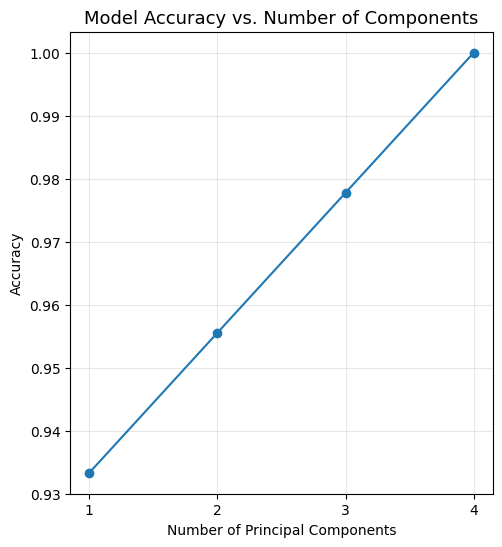

In [31]:
# Plot results
plt.figure(figsize=(12, 6))

# Accuracy vs. Number of Components
plt.subplot(1, 2, 1)
plt.plot(results_df['n_components'], results_df['accuracy'], marker='o', linestyle='-')
plt.title('Model Accuracy vs. Number of Components', fontsize=13)
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, X.shape[1] + 1))

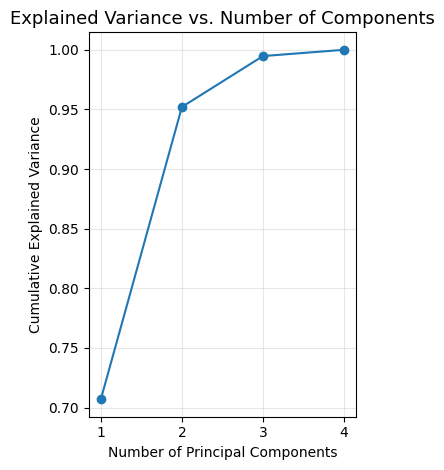

In [32]:
# Explained Variance vs. Number of Components
plt.subplot(1, 2, 2)
plt.plot(results_df['n_components'], results_df['explained_variance'], marker='o', linestyle='-')
plt.title('Explained Variance vs. Number of Components', fontsize=13)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, X.shape[1] + 1))

plt.tight_layout()
plt.show()

In [33]:
# Print the results
print(results_df.round(4))

   n_components  accuracy  explained_variance
0             1    0.9333              0.7070
1             2    0.9556              0.9521
2             3    0.9778              0.9948
3             4    1.0000              1.0000


In [34]:
# Find the optimal number of components
optimal_components = results_df.loc[results_df['accuracy'].idxmax(), 'n_components']
print(f"\nOptimal number of components: {optimal_components}")


Optimal number of components: 4


Original MNIST shape: (1000, 784)
PCA reduced shape: (1000, 133)
Number of components for 90% variance: 133
Explained variance ratio: 0.9012


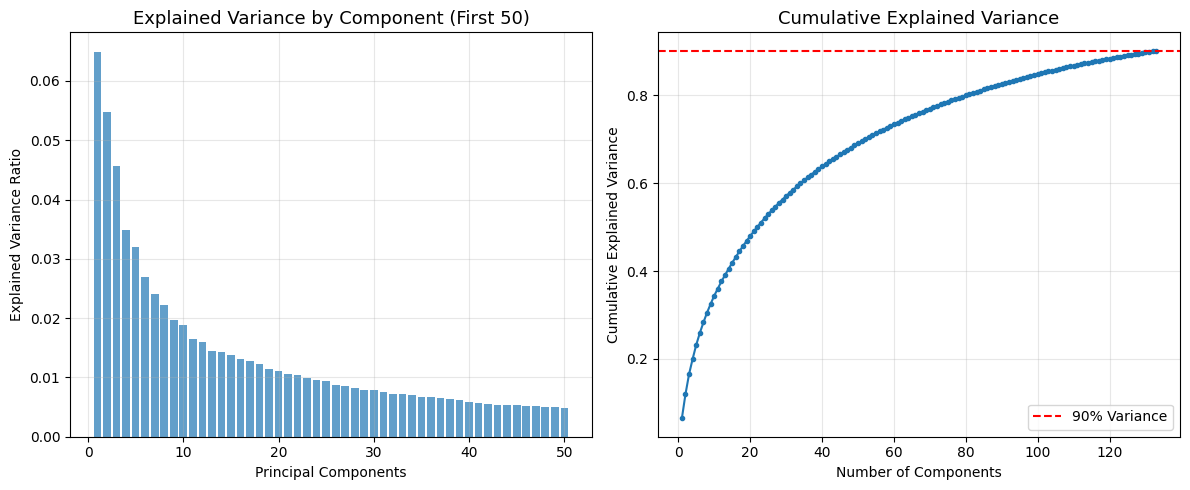

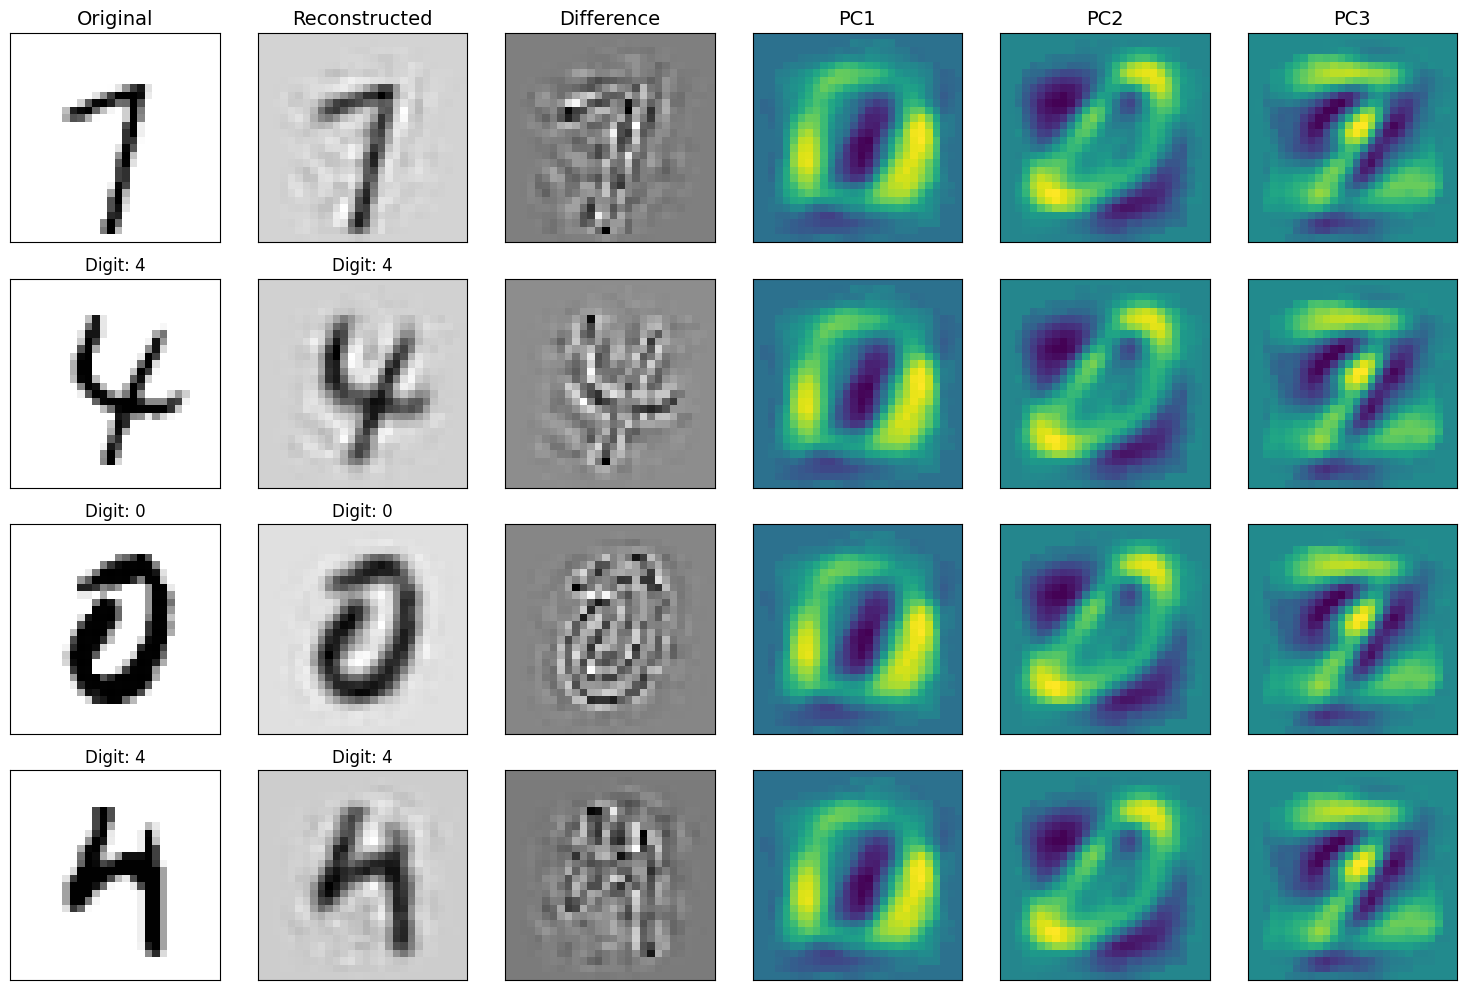

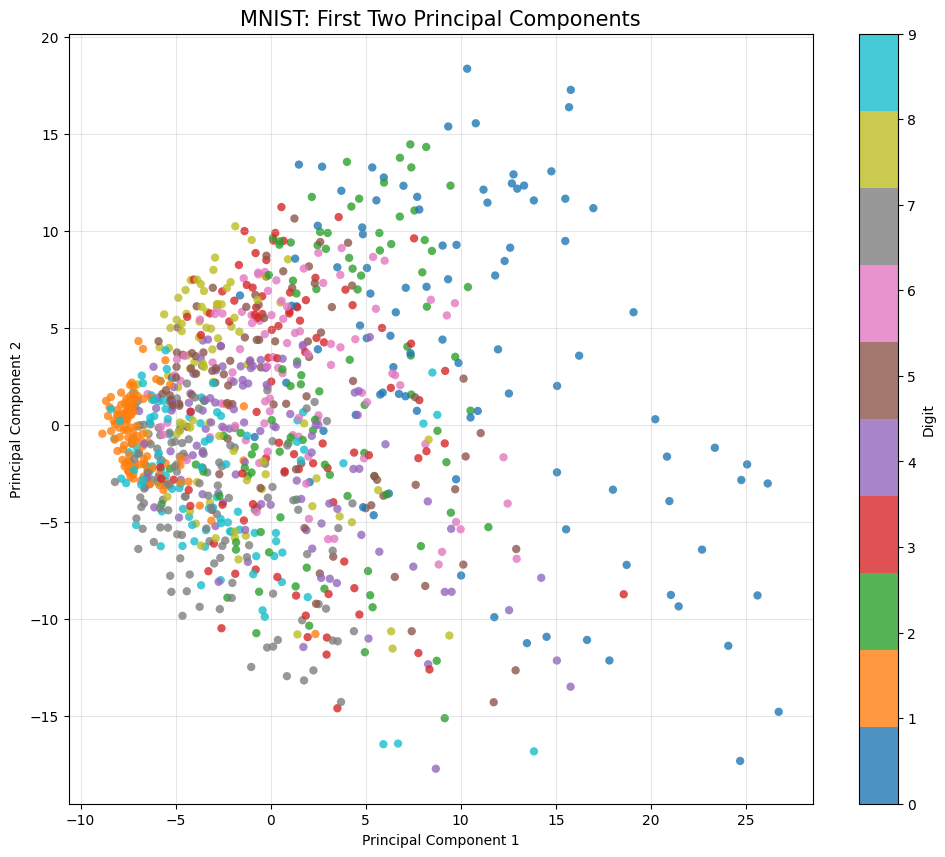

In [35]:
# Let's load a higher-dimensional dataset - MNIST digits
try:
    # Load a small subset of MNIST for demonstration
    mnist = fetch_openml('mnist_784', version=1, parser='auto')
    X_mnist = mnist.data.iloc[:1000].values  # Take just 1000 samples for speed
    y_mnist = mnist.target.iloc[:1000].values.astype(int)

    # Standardize the data
    scaler_mnist = StandardScaler()
    X_mnist_scaled = scaler_mnist.fit_transform(X_mnist)

    # Apply PCA
    pca_mnist = PCA(n_components=0.9)  # Keep components explaining 90% variance
    X_mnist_pca = pca_mnist.fit_transform(X_mnist_scaled)

    # Print information
    print(f"Original MNIST shape: {X_mnist.shape}")
    print(f"PCA reduced shape: {X_mnist_pca.shape}")
    print(f"Number of components for 90% variance: {pca_mnist.n_components_}")
    print(f"Explained variance ratio: {sum(pca_mnist.explained_variance_ratio_):.4f}")

    # Visualize the explained variance
    plt.figure(figsize=(12, 5))

    # Explained variance per component (first 50 components)
    plt.subplot(1, 2, 1)
    plt.bar(range(1, 51), pca_mnist.explained_variance_ratio_[:50], alpha=0.7)
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.title('Explained Variance by Component (First 50)', fontsize=13)
    plt.grid(True, alpha=0.3)

    # Cumulative explained variance
    plt.subplot(1, 2, 2)
    cumsum = np.cumsum(pca_mnist.explained_variance_ratio_)
    plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o', markersize=3, linestyle='-')
    plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
    plt.grid(True, alpha=0.3)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance', fontsize=13)
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Visualize some digits in the original and reduced space
    def plot_digit(data, digit_label=None, ax=None):
        if ax is None:
            fig, ax = plt.subplots(figsize=(2, 2))
        pixel_image = data.reshape(28, 28)
        ax.imshow(pixel_image, cmap='gray_r')
        ax.set_xticks([])
        ax.set_yticks([])
        if digit_label is not None:
            ax.set_title(f"Digit: {digit_label}")

    # Reconstruct images from PCA
    X_mnist_reconstructed = pca_mnist.inverse_transform(X_mnist_pca)
    X_mnist_reconstructed = scaler_mnist.inverse_transform(X_mnist_reconstructed)

    # Display original vs reconstructed images
    fig, axes = plt.subplots(4, 6, figsize=(15, 10))
    sample_indices = [42, 142, 542, 842]  # Sample indices

    for i, idx in enumerate(sample_indices):
        # Original image
        ax = axes[i, 0]
        plot_digit(X_mnist[idx], y_mnist[idx], ax)
        if i == 0:
            ax.set_title("Original", fontsize=14)

        # Add reconstructed image
        ax = axes[i, 1]
        plot_digit(X_mnist_reconstructed[idx], y_mnist[idx], ax)
        if i == 0:
            ax.set_title("Reconstructed", fontsize=14)

        # Add difference
        ax = axes[i, 2]
        plot_digit(X_mnist[idx] - X_mnist_reconstructed[idx], None, ax)
        if i == 0:
            ax.set_title("Difference", fontsize=14)

        # Show some principal components
        for j in range(3):
            component_idx = j
            ax = axes[i, j+3]
            component = pca_mnist.components_[component_idx].reshape(28, 28)
            ax.imshow(component, cmap='viridis')
            ax.set_xticks([])
            ax.set_yticks([])
            if i == 0:
                ax.set_title(f"PC{component_idx+1}", fontsize=14)

    plt.tight_layout()
    plt.show()

    # Visualize the first two principal components
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='tab10',
                        alpha=0.8, edgecolors='none')
    plt.colorbar(scatter, label='Digit')
    plt.title('MNIST: First Two Principal Components', fontsize=15)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True, alpha=0.3)
    plt.show()
except Exception as e:
    print(f"Error loading MNIST dataset: {e}")